In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import matplotlib.gridspec as gridspec

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
import io
data = zipfile.ZipFile('drive/My Drive/Colab Notebooks/Intel_Image/seg_train.zip', 'r')
data.extractall()

In [0]:
import zipfile
import io
data = zipfile.ZipFile('drive/My Drive/Colab Notebooks/Intel_Image/seg_test.zip', 'r')
data.extractall()

In [0]:
import zipfile
import io
data = zipfile.ZipFile('drive/My Drive/Colab Notebooks/Intel_Image/seg_pred.zip', 'r')
data.extractall()

In [0]:
pred = []

predict = os.listdir("seg_pred/")
for a in predict:
    try:
        image=cv2.imread("seg_pred/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        pred.append(np.array(size_image))
    except AttributeError:
        print("err build")


In [0]:
#Train
data=[]
labels=[]

train_build = os.listdir("seg_train/buildings/")
for build in train_build:
    try:
        image=cv2.imread("seg_train/buildings/"+build)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("err build")

train_forest = os.listdir("seg_train/forest/")
for forest in train_forest:
    try:
        image=cv2.imread("seg_train/forest/"+forest)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("err forest")
        
train_glacier = os.listdir("seg_train/glacier/")
for glacier in train_glacier:
    try:
        image=cv2.imread("seg_train/glacier/"+glacier)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("err glacier")
        
train_mountain = os.listdir("seg_train/mountain/")
for mountain in train_mountain:
    try:
        image=cv2.imread("seg_train/mountain/"+mountain)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(3)
    except AttributeError:
        print("err mountain")
        
train_sea = os.listdir("seg_train/sea/")
for sea in train_sea:
    try:
        image=cv2.imread("seg_train/sea/"+sea)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(4)
    except AttributeError:
        print("err sea")
        
train_street = os.listdir("seg_train/street/")
for street in train_street:
    try:
        image=cv2.imread("seg_train/street/"+street)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        data.append(np.array(size_image))
        labels.append(5)
    except AttributeError:
        print("err street")

In [0]:
#test
test=[]
test_labels=[]

test_build = os.listdir("seg_test/buildings/")
for build in test_build:
    try:
        image=cv2.imread("seg_test/buildings/"+build)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(0)
    except AttributeError:
        print("err build")

test_forest = os.listdir("seg_test/forest/")
for forest in test_forest:
    try:
        image=cv2.imread("seg_test/forest/"+forest)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(1)
    except AttributeError:
        print("err forest")
        
test_glacier = os.listdir("seg_test/glacier/")
for glacier in test_glacier:
    try:
        image=cv2.imread("seg_test/glacier/"+glacier)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(2)
    except AttributeError:
        print("err glacier")
        
test_mountain = os.listdir("seg_test/mountain/")
for mountain in test_mountain:
    try:
        image=cv2.imread("seg_test/mountain/"+mountain)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(3)
    except AttributeError:
        print("err mountain")
        
test_sea = os.listdir("seg_test/sea/")
for sea in test_sea:
    try:
        image=cv2.imread("seg_test/sea/"+sea)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(4)
    except AttributeError:
        print("err sea")
        
test_street = os.listdir("seg_test/street/")
for street in test_street:
    try:
        image=cv2.imread("seg_test/street/"+street)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((150, 150))
        test.append(np.array(size_image))
        test_labels.append(5)
    except AttributeError:
        print("err street")

In [0]:
df = np.array(data)
labels = np.array(labels)
randomize = np.arange(len(df))
np.random.shuffle(randomize)
df = df[randomize]
labels = labels[randomize]

In [0]:
model=Models.Sequential()
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPooling2D(pool_size=5))
model.add(Layers.Conv2D(filters=180,kernel_size=3,padding="same",activation="relu"))
model.add(Layers.MaxPooling2D(pool_size=5))
model.add(Layers.Conv2D(filters=100,kernel_size=3,padding="same",activation="relu"))
model.add(Layers.MaxPooling2D(pool_size=5))
model.add(Layers.Dropout(0.5))
model.add(Layers.Flatten())
model.add(Layers.Dense(200,activation="relu"))
model.add(Layers.Dense(100,activation="relu"))
model.add(Layers.Dropout(0.5))
model.add(Layers.Dense(6,activation="softmax"))#2 represent output layer neurons 

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 180)       291780    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 180)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 5, 100)         162100    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 100)         0         
__________

In [0]:
trained = model.fit(df,labels, epochs=35,validation_split=0.3)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 193s 20ms/sample - loss: 2.5438 - acc: 0.2699 - val_loss: 1.3343 - val_acc: 0.4956
Epoch 2/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 1.4471 - acc: 0.3930 - val_loss: 1.1748 - val_acc: 0.5310
Epoch 3/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 1.2821 - acc: 0.4667 - val_loss: 1.0224 - val_acc: 0.6203
Epoch 4/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 1.1728 - acc: 0.5276 - val_loss: 0.9705 - val_acc: 0.6521
Epoch 5/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 1.0870 - acc: 0.5616 - val_loss: 0.8399 - val_acc: 0.6861
Epoch 6/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 1.0034 - acc: 0.6041 - val_loss: 0.7807 - val_acc: 0.7333
Epoch 7/35
9823/9823 [==============================] - 180s 18ms/sample - loss: 0.9417 - acc: 0.6382 - val_loss: 0.71

In [0]:

randomize = np.arange(len(test))
np.random.shuffle(randomize)
test = test[randomize]
test_labels = test_labels[randomize]

In [0]:
model.evaluate(test,test_labels)


3000/3000 [==============================] - 15s 5ms/sample - loss: 0.4360 - acc: 0.8603


[0.43597401976585387, 0.8603333]

In [0]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

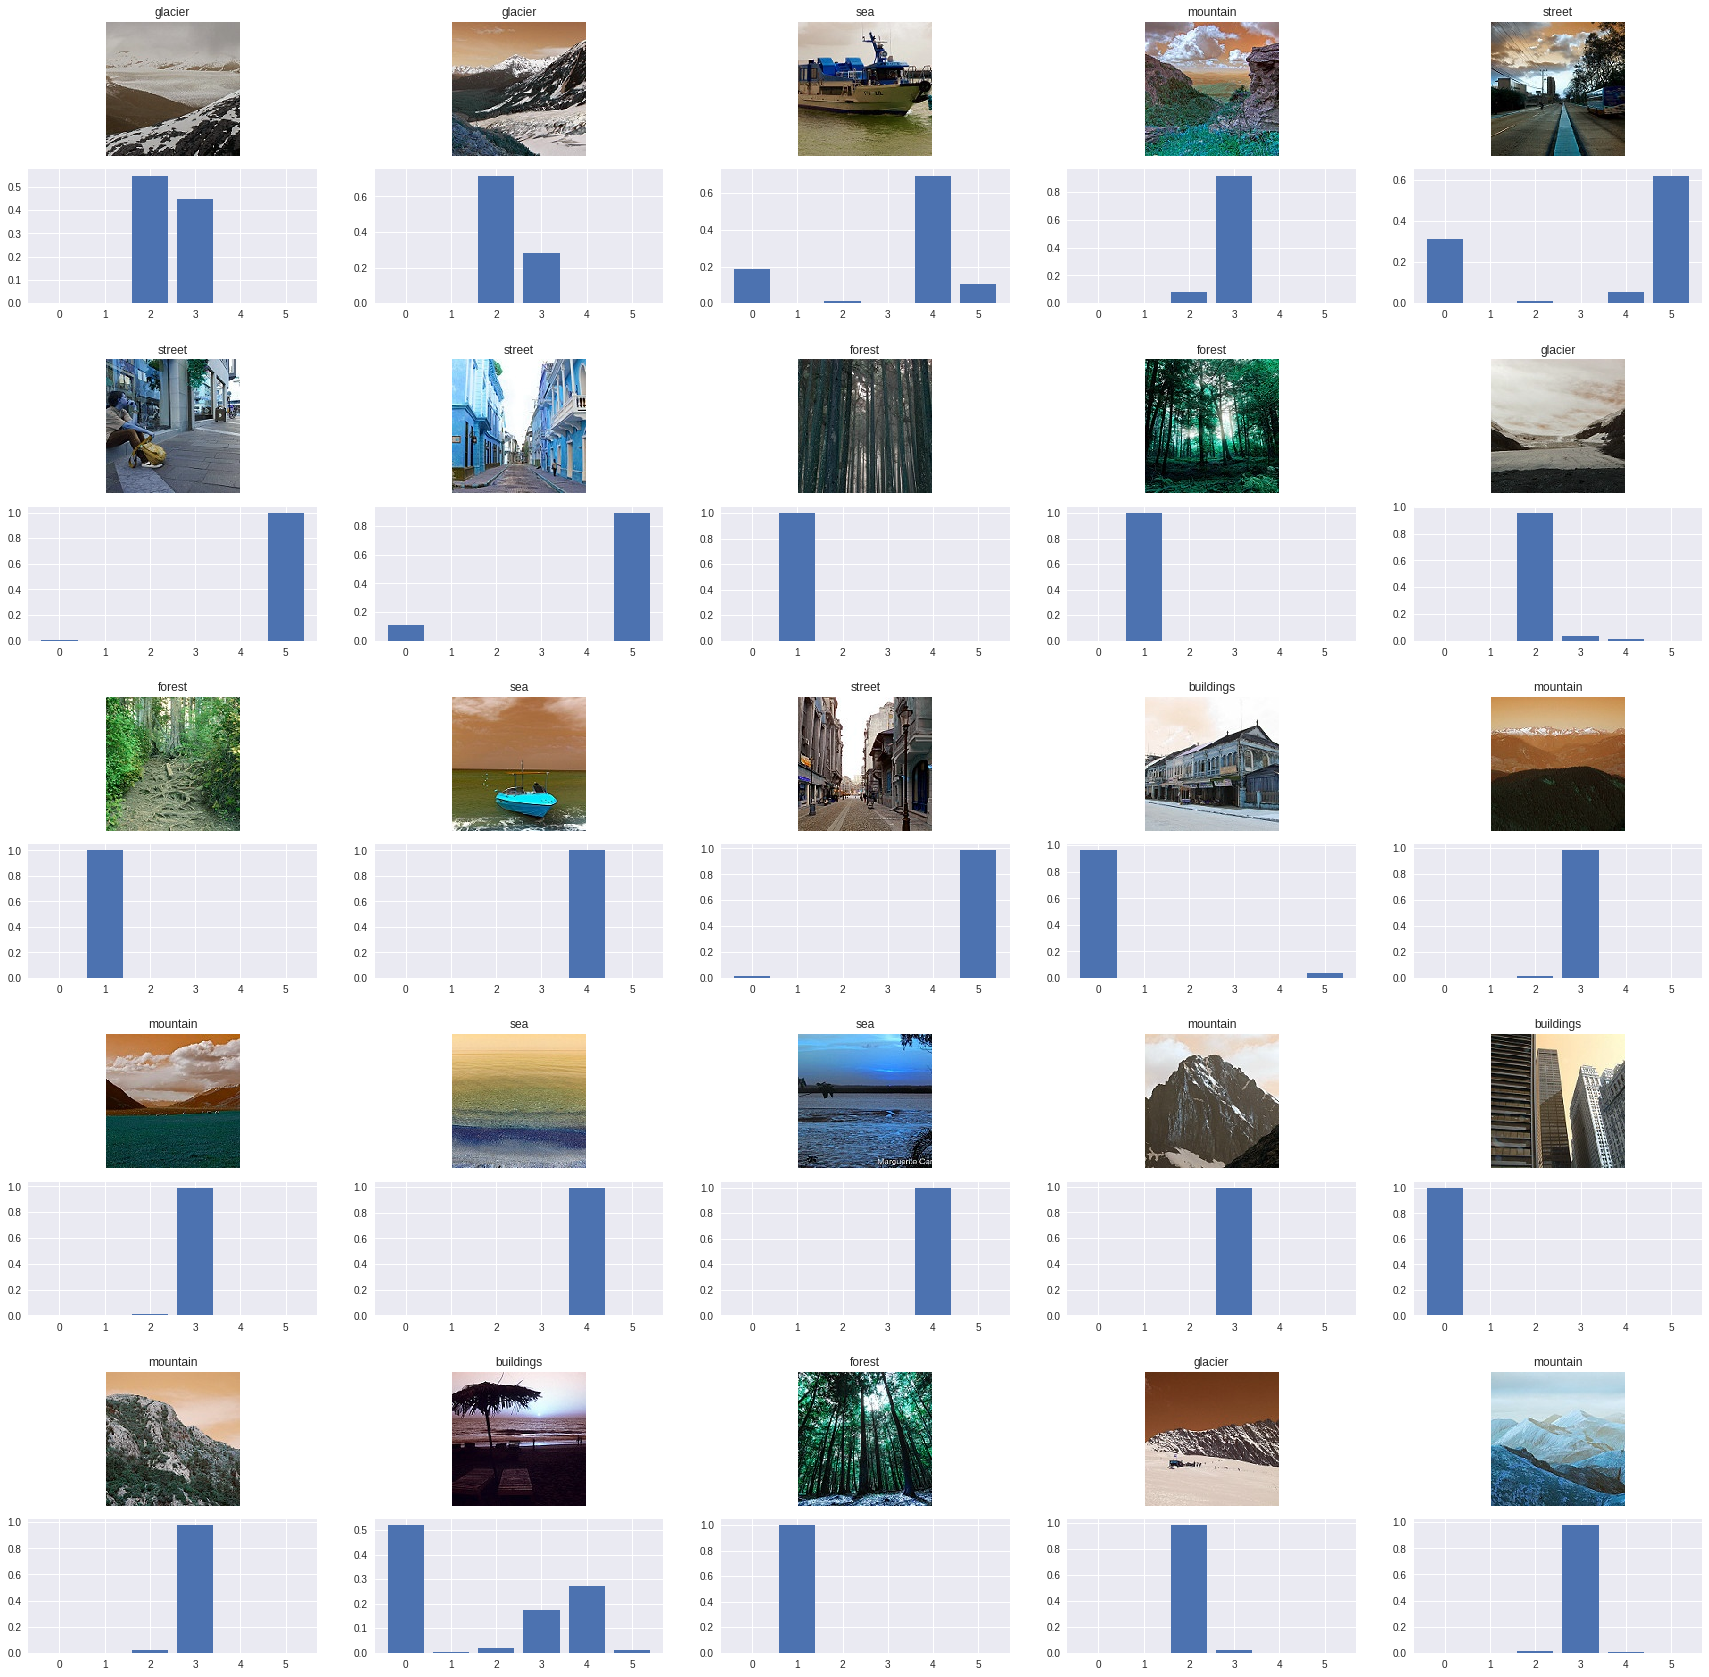

In [0]:
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred))
    pred_image = np.array([pred[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()